In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [8]:
df_penguins = sns.load_dataset("penguins")

In [9]:
df_penguins = df_penguins[df_penguins["sex"].notnull()]

In [10]:
df_penguins = df_penguins.drop(columns = "island", axis=0)

In [11]:
adelie = df_penguins[df_penguins["species"]=="Adelie"].sample(n=50)
gentoo = df_penguins[df_penguins["species"]=="Gentoo"].sample(n=50)
chinstrap = df_penguins[df_penguins["species"]=="Chinstrap"].sample(n=50)

In [12]:
new_peng = pd.concat([adelie, gentoo, chinstrap], axis = 0)

In [13]:
peng_sex = pd.get_dummies(new_peng["sex"])

new_peng = new_peng.drop(columns = "sex", axis = 0)

final_df = pd.concat([new_peng, peng_sex], axis = 1)

In [14]:
from google.colab import files
#printing as a csv locally
final_df.to_csv("Section7df.csv")
files.download("Section7df.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 

In [16]:
title = "Section 7 DF - GS"

gc.create(title)

<Spreadsheet 'Section 7 DF - GS' id:1IEKG9S-FitEgG0NAGKfkLiN6zcbyQO9Ma-M_6ZO0f8o>

In [17]:
sheet1 = gc.open("Section 7 DF - GS").worksheet("Sheet1")

set_with_dataframe(sheet1, final_df)

In [5]:
spreadsheet = gc.open("Section 7 DF - GS")

sheet1 = spreadsheet.worksheet("Sheet1")

In [6]:
df = pd.DataFrame(sheet1.get_all_records())

IndexError: ignored

In [16]:
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,FEMALE,MALE
0,Adelie,40.9,16.8,191,3700,1,0
1,Adelie,40.6,18.8,193,3800,0,1
2,Adelie,38.1,18.6,190,3700,1,0
3,Adelie,36.6,18.4,184,3475,1,0
4,Adelie,36.4,17.0,195,3325,1,0
...,...,...,...,...,...,...,...
145,Chinstrap,50.9,17.9,196,3675,1,0
146,Chinstrap,45.5,17.0,196,3500,1,0
147,Chinstrap,43.2,16.6,187,2900,1,0
148,Chinstrap,50.3,20.0,197,3300,0,1


In [17]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=32)

In [18]:
Y_test = test_df["species"]

X_test = test_df.drop(columns= ["species"], axis = 1)

Y_train = train_df["species"]

X_train = train_df.drop(columns= ["species"], axis = 1)

In [19]:
features = X_train.copy()
targets = Y_train.copy()

models = [
          MultinomialNB(),
          LogisticRegression(multi_class="multinomial", max_iter= 10000),
          KNeighborsClassifier(),
          SVC(),
          RandomForestClassifier()
]

CV = 5

cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, targets, scoring = "accuracy", cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))

cv_df = pd.DataFrame(entries, columns=['model_name','fold_idx', 'accuracy'])

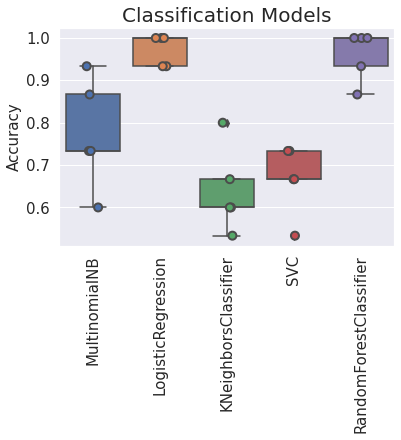

In [21]:
#visualizing the results
sns.set(color_codes=True)
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classification Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=15)
plt.xlabel('')
plt.xticks(fontsize=15,rotation=90)
plt.yticks(fontsize=15,rotation=0)
plt.show()

In [22]:
#looking at average r squared
final_comp = cv_df.groupby('model_name').accuracy.mean().reset_index().sort_values(by = "accuracy", ascending = False)
final_comp

,model_name,accuracy
1,LogisticRegression,0.973333
3,RandomForestClassifier,0.960000
2,MultinomialNB,0.773333
4,SVC,0.666667
0,KNeighborsClassifier,0.640000


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe
from google.colab import auth
auth.authenticate_user()  # verify your account to read files which you have access to. Make sure you have permission to read the file!
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default()) 

In [ ]:
spreadsheet = gc.open("Section 7 DF - GS")

In [ ]:
sheet1 = spreadsheet.worksheet("Sheet1")

In [ ]:
df = pd.DataFrame(sheet1.get_all_records())